In [1]:
# 패키지 설치
!pip install yfinance

In [2]:
import yfinance as yf

In [4]:
# stock = yf.Ticker("GOOG") # 주가 조회 도구 - 구글
# stock = yf.Ticker("MSFT") # 주가 조회 도구 - Micro Soft
# stock = yf.Ticker("AAPL") # 주가 조회 도구 - Apple
# stock = yf.Ticker("TSLA") # 주가 조회 도구 - 테슬라
# stock = yf.Ticker("NVDA") # 주가 조회 도구 - 엔비디아
stock = yf.Ticker("005930.KS") # 주가 조회 도구 - 삼성전자 = KR7005930003
stock.history()   # 해당 회사의 주가 정보 가져오기
stock.history().head()   # 해당 회사의 주가 정보 가져오기

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-11-18 00:00:00+09:00,57000.0,57500.0,55900.0,56700.0,48095234,0.0,0.0
2024-11-19 00:00:00+09:00,56500.0,57500.0,55900.0,56300.0,31539632,0.0,0.0
2024-11-20 00:00:00+09:00,56100.0,56500.0,54800.0,55300.0,20864667,0.0,0.0
2024-11-21 00:00:00+09:00,54900.0,56900.0,54700.0,56400.0,19096850,0.0,0.0
2024-11-22 00:00:00+09:00,56000.0,56700.0,55900.0,56000.0,15281543,0.0,0.0


In [15]:
stock = yf.Ticker('005930.KS')

# quotes = stock.history(start='2024-01-01', end='2024-12-16')
quotes = stock.history(start='2000-01-01', end='2024-12-31')
print(quotes.head(5))
print(quotes.tail(5))
# 날짜 시가 고가 저가 종가 거래량
# 액면분할에 대한 보정이 다 일어난 상태로 보여준다. 액면분할 전 가격은 분할 후 가격으로 보정해준다.
# Dividends  Stock Splits 안해도 될듯.
# 목표값은 open or close

                                  Open         High          Low        Close  \
Date                                                                            
2000-01-04 00:00:00+09:00  4325.925736  4405.234375  4080.789945  4405.234375   
2000-01-05 00:00:00+09:00  4181.729889  4369.186747  3979.853274  4023.112549   
2000-01-06 00:00:00+09:00  4145.679580  4167.309212  4023.111662  4051.951172   
2000-01-07 00:00:00+09:00  4008.691972  4088.000626  3864.494419  3994.272217   
2000-01-10 00:00:00+09:00  4037.532157  4160.100098  4023.112399  4160.100098   

                             Volume  Dividends  Stock Splits  
Date                                                          
2000-01-04 00:00:00+09:00  74195000        0.0           0.0  
2000-01-05 00:00:00+09:00  74680000        0.0           0.0  
2000-01-06 00:00:00+09:00  54390000        0.0           0.0  
2000-01-07 00:00:00+09:00  40305000        0.0           0.0  
2000-01-10 00:00:00+09:00  46880000        0.0        

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras as tf_keras
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [26]:
quotes.reset_index(inplace=True)

# 데이터 준비 및 확인

In [51]:
# 데이터 준비
quotes.info()
features = quotes[['Open', 'High', 'Low', 'Volume']]
target = quotes['Close']
# target = quotes[['Close']] > target은 dataframe, target = quotes['Close'] > target은 series

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6253 entries, 0 to 6252
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                     
---  ------        --------------  -----                     
 0   Date          6253 non-null   datetime64[ns, Asia/Seoul]
 1   Open          6253 non-null   float64                   
 2   High          6253 non-null   float64                   
 3   Low           6253 non-null   float64                   
 4   Close         6253 non-null   float64                   
 5   Volume        6253 non-null   int64                     
 6   Dividends     6253 non-null   float64                   
 7   Stock Splits  6253 non-null   float64                   
dtypes: datetime64[ns, Asia/Seoul](1), float64(6), int64(1)
memory usage: 390.9 KB


                          Date          Open          High           Low  \
206  2000-10-18 00:00:00+09:00   1831.309180   1989.926511   1744.790636   
6144 2024-07-09 00:00:00+09:00  87310.109375  87707.877527  86415.131033   
6145 2024-07-10 00:00:00+09:00  87111.225299  87508.993451  86614.015109   

             Close     Volume  Dividends  Stock Splits  
206    1968.296875  164215000        0.0           0.0  
6144  87310.109375   21336201        0.0           0.0  
6145  87310.109375   17813847        0.0           0.0  


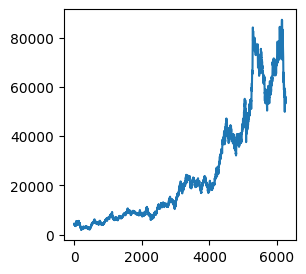

In [52]:
# 데이터 확인
min_mask = quotes['Close'] == quotes['Close'].min()
max_mask = quotes['Close'] == quotes['Close'].max()
print( quotes[min_mask | max_mask])

plt.figure(figsize=(3, 3))
plt.plot(target)
plt.show()

In [53]:
# 데이터 정규화
features_ss = StandardScaler().fit_transform(features)
features_mm = MinMaxScaler().fit_transform(features)

In [54]:
# 전체 6253
print(features.shape[0] * 0.8)        # 5002.400000000001  > 4992 = 152*32
print(features.shape[0] * 0.8 * 0.8)  # 4001.9200000000005 > 4000 = 125*32

5002.400000000001
4001.9200000000005


# 데이터셋 만들기

In [56]:
# 15일치 데이터를 활용하여 타겟 예측
days = 15
delay = (days + 0)

In [77]:
# 데이터셋 만들기

datasets = []
for sidx, eidx in zip([0, 4000, 4992], [4000, 4992, None]):
  dataset = tf_keras.utils.timeseries_dataset_from_array(
      data = features[:-delay],
      targets = target[delay:],
      sequence_length=days,
      sequence_stride=1,
      batch_size=32,
      shuffle=False,
      seed=42,
      start_index=sidx,
      end_index=eidx
  )
  datasets.append(dataset)

  # 데이터셋 만들기 standard
datasets_ss = []
for sidx, eidx in zip([0, 4000, 4992], [4000, 4992, None]):
  dataset_ss = tf_keras.utils.timeseries_dataset_from_array(
      data = features_ss[:-delay],
      targets = target[delay:],
      sequence_length=days,
      sequence_stride=1,
      batch_size=32,
      shuffle=False,
      seed=42,
      start_index=sidx,
      end_index=eidx
  )
  datasets_ss.append(dataset_ss)

# 데이터셋 만들기 minmax
datasets_mm = []
for sidx, eidx in zip([0, 4000, 4992], [4000, 4992, None]):
  dataset_mm = tf_keras.utils.timeseries_dataset_from_array(
      data = features_mm[:-delay],
      targets = target[delay:],
      sequence_length=days,
      sequence_stride=1,
      batch_size=32,
      shuffle=False,
      seed=42,
      start_index=sidx,
      end_index=eidx
  )
  datasets_mm.append(dataset_mm)

In [78]:
# 데이터 셋 확인
for X, y in datasets[0]:
  print(X.shape, y.shape)
  break

(32, 15, 4) (32,)


# RNN

In [79]:
# 모델 구조 설계 : RNN
input = tf_keras.layers.Input(shape=(15, 4))
x = tf_keras.layers.SimpleRNN(units=16, return_sequences=True)(input)
x = tf_keras.layers.SimpleRNN(units=32)(x)
output = tf_keras.layers.Dense(units=1)(x)
model_rnn = tf_keras.Model(input, output)

model_rnn.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 15, 4)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_14 (SimpleRNN)            │ (None, 15, 16)              │             336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_15 (SimpleRNN)            │ (None, 32)                  │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,937 (7.57 KB)

 Trainable params: 1,937 (7.57 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
# 모델 학습 설계 : 완전 연결망
model_rnn.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [ ]:
# 모델 학습 : 완전 연결망
history_rnn = model_rnn.fit(datasets[0], epochs=100, validation_data=datasets[1])
history_rnn_ss = model_rnn.fit(datasets_ss[0], epochs=100, validation_data=datasets_ss[1])
history_rnn_mm = model_rnn.fit(datasets_mm[0], epochs=100, validation_data=datasets_mm[1])

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 54307264.0000 - mse: 54307264.0000 - val_loss: 1236780160.0000 - val_mse: 1236780160.0000
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 54219904.0000 - mse: 54219904.0000 - val_loss: 1236508288.0000 - val_mse: 1236508288.0000
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 54170280.0000 - mse: 54170280.0000 - val_loss: 1236249344.0000 - val_mse: 1236249344.0000
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 54122680.0000 - mse: 54122680.0000 - val_loss: 1235995648.0000 - val_mse: 1235995648.0000
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 54075916.0000 - mse: 54075916.0000 - val_loss: 1235744384.0000 - val_mse: 1235744384.0000
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 54029620.0000 - mse: 54029620.0000 - val_loss: 1235495168.0000 - val_mse: 1235495168.0000
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 53983628.0000 - mse: 53983

In [82]:
# 모델 평가
print(model_rnn.evaluate(datasets[2]))
# [4107559936.0, 4107559936.0]

print(model_rnn.evaluate(datasets_ss[2]))
# [4362028032.0, 4362028032.0]

print(model_rnn.evaluate(datasets_mm[2]))
# [4257993984.0, 4257993984.0]

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3473089280.0000 - mse: 3473089280.0000
[4107559936.0, 4107559936.0]
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3697746688.0000 - mse: 3697746688.0000
[4362028032.0, 4362028032.0]
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3566361344.0000 - mse: 3566361344.0000
[4257993984.0, 4257993984.0]


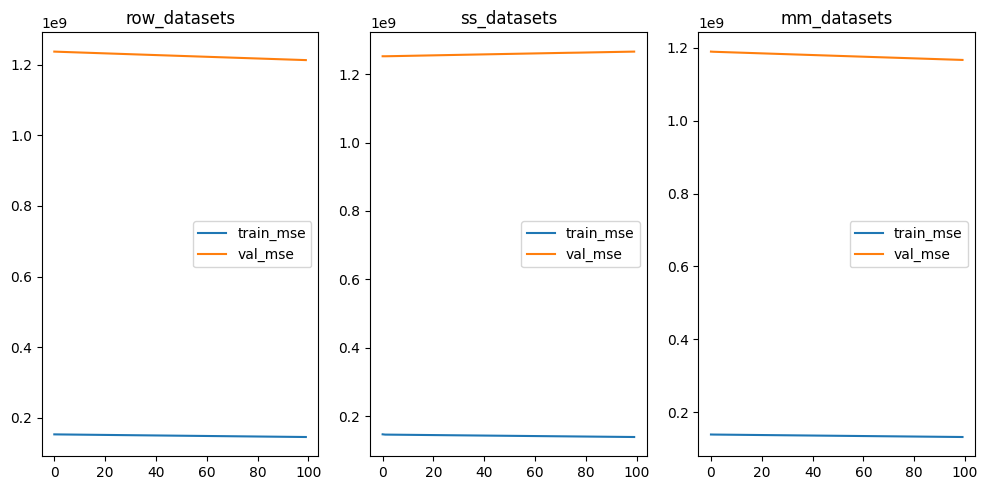

In [86]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.plot(history_rnn.epoch, history_rnn.history['mse'], label='train_mse')
plt.plot(history_rnn.epoch, history_rnn.history['val_mse'], label='val_mse')
plt.title('row_datasets')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history_rnn_ss.epoch, history_rnn_ss.history['mse'], label='train_mse')
plt.plot(history_rnn_ss.epoch, history_rnn_ss.history['val_mse'], label='val_mse')
plt.title('ss_datasets')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history_rnn_mm.epoch, history_rnn_mm.history['mse'], label='train_mse')
plt.plot(history_rnn_mm.epoch, history_rnn_mm.history['val_mse'], label='val_mse')
plt.title('mm_datasets')
plt.legend()

plt.tight_layout()
plt.show()

# LSTM

In [83]:
# 모델 구조 설계 LSTM
input = tf_keras.layers.Input(shape=(15, 4))
x = tf_keras.layers.LSTM(units=64, return_sequences=True)(input)
x = tf_keras.layers.Dropout(0.2)(x)
x = tf_keras.layers.LSTM(units=32)(x)
x = tf_keras.layers.Dense(16, activation='relu')(x)
output = tf_keras.layers.Dense(units=1)(x)
model_lstm = tf_keras.Model(input, output)

In [84]:
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [85]:
# 모델 학습 : 완전 연결망
history_lstm = model_lstm.fit(datasets[0], epochs=100, validation_data=datasets[1])
history_lstm_ss = model_lstm.fit(datasets_ss[0], epochs=100, validation_data=datasets_ss[1])
history_lstm_mm = model_lstm.fit(datasets_mm[0], epochs=100, validation_data=datasets_mm[1])

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 54290048.0000 - mse: 54290048.0000 - val_loss: 1236224512.0000 - val_mse: 1236224512.0000
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 54072180.0000 - mse: 54072180.0000 - val_loss: 1234971264.0000 - val_mse: 1234971264.0000
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 53817524.0000 - mse: 53817524.0000 - val_loss: 1233276416.0000 - val_mse: 1233276416.0000
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 53480920.0000 - mse: 53480920.0000 - val_loss: 1231118592.0000 - val_mse: 1231118592.0000
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 53060688.0000 - mse: 53060688.0000 - val_loss: 1228498944.0000 - val_mse: 1228498944.0000
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 52558832.0000 - mse: 52558832.0000 - val_loss: 1225430144.0000 - val_mse: 1225430144.0000
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 51979100.0000 - mse: 51979

In [87]:
# 모델 평가
print(model_lstm.evaluate(datasets[2]))
# [3103571968.0, 3103571968.0]
print(model_lstm.evaluate(datasets_ss[2]))
# [3985661184.0, 3985661184.0]
print(model_lstm.evaluate(datasets_mm[2]))
# [3866272512.0, 3866272512.0]

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2557364480.0000 - mse: 2557364480.0000 
[3103571968.0, 3103571968.0]
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3340601600.0000 - mse: 3340601600.0000 
[3985661184.0, 3985661184.0]
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3245129728.0000 - mse: 3245129728.0000
[3866272512.0, 3866272512.0]


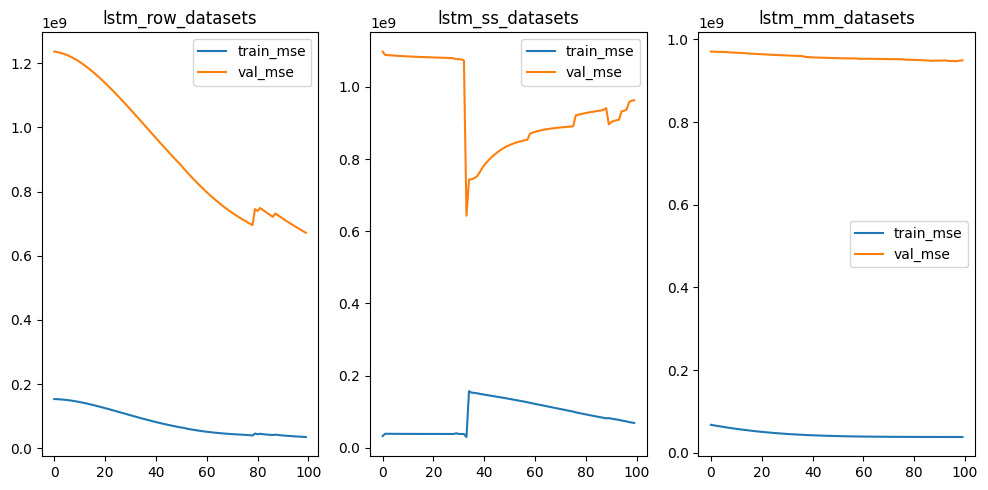

In [91]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.plot(history_lstm.epoch, history_lstm.history['mse'], label='train_mse')
plt.plot(history_lstm.epoch, history_lstm.history['val_mse'], label='val_mse')
plt.title('lstm_row_datasets')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history_lstm_ss.epoch, history_lstm_ss.history['mse'], label='train_mse')
plt.plot(history_lstm_ss.epoch, history_lstm_ss.history['val_mse'], label='val_mse')
plt.title('lstm_ss_datasets')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history_lstm_mm.epoch, history_lstm_mm.history['mse'], label='train_mse')
plt.plot(history_lstm_mm.epoch, history_lstm_mm.history['val_mse'], label='val_mse')
plt.title('lstm_mm_datasets')
plt.legend()

plt.tight_layout()
plt.show()

# CNN

In [100]:
# CNN을 사용해서 순환 신경망 모방 모델 구조 설계
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Reshape, GlobalAvgPool1D

input = Input(shape=(15, 4))
x = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input)
x = MaxPooling1D(pool_size=2)(x)
x = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling1D(pool_size=2)(x)
x = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling1D(pool_size=2)(x)
x = GlobalAvgPool1D()(x)
output = Dense(1)(x)
model_cnn = tf_keras.models.Model(input, output)

model_cnn.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)          │ (None, 15, 4)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_15 (Conv1D)                   │ (None, 15, 32)              │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_12 (MaxPooling1D)      │ (None, 7, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_16 (Conv1D)                   │ (None, 7, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_13 (MaxPooling1D)      │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_17 (Conv1D)                   │ (None, 3, 128)              │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_14 (MaxPooling1D)      │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_3           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,457 (122.88 KB)

 Trainable params: 31,457 (122.88 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
model_cnn.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [104]:
history_cnn = model_cnn.fit(datasets[0], epochs=100, validation_data=datasets[1])
history_cnn_ss = model_cnn.fit(datasets_ss[0], epochs=100, validation_data=datasets_ss[1])
history_cnn_mm = model_cnn.fit(datasets_mm[0], epochs=100, validation_data=datasets_mm[1])

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 7231808995328.0000 - mse: 7231808995328.0000 - val_loss: 12473310208.0000 - val_mse: 12473310208.0000
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 102601310208.0000 - mse: 102601310208.0000 - val_loss: 4799887872.0000 - val_mse: 4799887872.0000
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 51901620224.0000 - mse: 51901620224.0000 - val_loss: 3801376000.0000 - val_mse: 3801376000.0000
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 36790616064.0000 - mse: 36790616064.0000 - val_loss: 3057911552.0000 - val_mse: 3057911552.0000
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 26517671936.0000 - mse: 26517671936.0000 - val_loss: 2682513408.0000 - val_mse: 2682513408.0000
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 19775731712.0000 - mse: 19775731712.0000 - val_loss: 2408045568.0000 - val_mse: 2408045568.0000
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/s

In [108]:
print(model_cnn.evaluate(datasets[2]))
# [6.660103888667096e+19, 6.660103888667096e+19]
print(model_cnn.evaluate(datasets_ss[2]))
# [2680450560.0, 2680450560.0]
print(model_cnn.evaluate(datasets_mm[2]))
# [220524304.0, 220524304.0]

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 69497398804837564416.0000 - mse: 69497398804837564416.0000
[6.660103888667096e+19, 6.660103888667096e+19]
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1884052096.0000 - mse: 1884052096.0000
[2680450560.0, 2680450560.0]
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 182733536.0000 - mse: 182733536.0000
[220524304.0, 220524304.0]


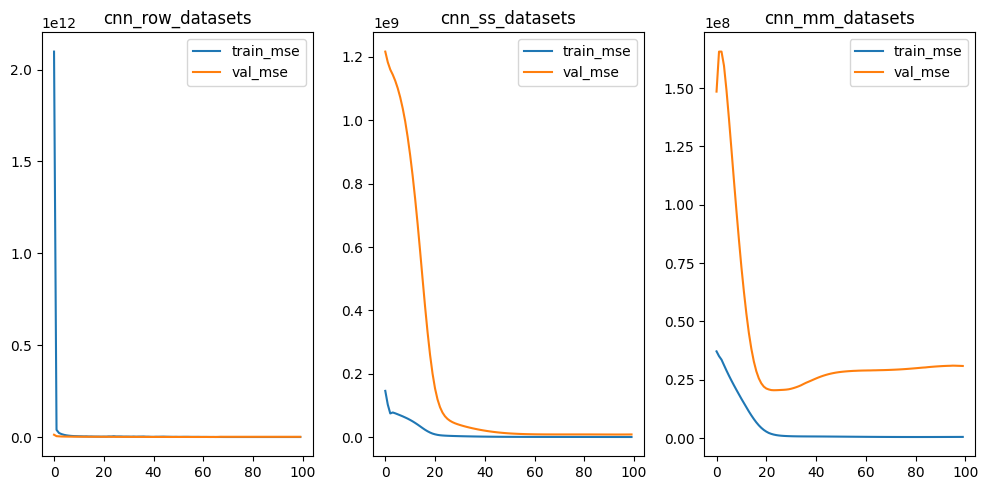

In [109]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.plot(history_cnn.epoch, history_cnn.history['mse'], label='train_mse')
plt.plot(history_cnn.epoch, history_cnn.history['val_mse'], label='val_mse')
plt.title('cnn_row_datasets')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history_cnn_ss.epoch, history_cnn_ss.history['mse'], label='train_mse')
plt.plot(history_cnn_ss.epoch, history_cnn_ss.history['val_mse'], label='val_mse')
plt.title('cnn_ss_datasets')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history_cnn_mm.epoch, history_cnn_mm.history['mse'], label='train_mse')
plt.plot(history_cnn_mm.epoch, history_cnn_mm.history['val_mse'], label='val_mse')
plt.title('cnn_mm_datasets')
plt.legend()

plt.tight_layout()
plt.show()